In [1]:
#Load json files from the web and convert bytes into utf

In [2]:
import re
import urllib  # the lib that handles the url stuff
import json

def getJsonFromWeb(url):
    data = urllib.request.urlopen(url)
    raw_data = data.read()
    encoding = data.info().get_content_charset('utf8')  # JSON default
    return raw_data.decode(encoding)

def convertKeyNames(json):
    #Convert the strings into actual JSON objects - first regex fixes the keys, second the values
    json = re.sub("((?=\D)\w+):", r'"\1":',  json)
    json = re.sub(": ((?=\D)\w+)", r':"\1"',  json)
    return json

def getOnMapJsonFromWeb(url, index):
    data = getJsonFromWeb(url)
    #Take out the variable names to get pure json format
    map_json = str(data.split("map_json["+ str(index) + "] = ")[1])
    map_json = str(map_json.split(";")[0])
    on_map_json = str(data.split("on_map_json[" + str(index) + "] = ")[1])
    on_map_json = str(on_map_json.split(";")[0]) 
    on_map_json = convertKeyNames(on_map_json)
    return on_map_json

def loadBaseFiles(url, filterStr):
    data = getJsonFromWeb(url)
    data = str(data.split(filterStr)[1])
    data = str(data.split(";")[0])
    return convertKeyNames(data)



In [3]:
#ENTER THE NUMBER OF MAPS FROM RPG MO
noOfMaps = 41

#On_map of all maps will be directly accesible here, maps[mapId][index] returns tile value
maps = {}

for mapId in range(0, noOfMaps):
    maps[mapId] = json.loads(getOnMapJsonFromWeb("http://rpg.mo.ee/maps/map"+str(mapId)+".js", mapId))


In [4]:
#read object base https://www.dropbox.com/s/si3xwwl0qeox8p0/object_base.js?dl=0
#data = urllib.request.urlopen("https://dl.dropboxusercontent.com/s/si3xwwl0qeox8p0/object_base.js")
#raw_data = data.read()
#encoding = data.info().get_content_charset('utf8')  # JSON default
#data = raw_data.decode(encoding)

#object_base = data.split("var object_base = ")[1]
#object_base = object_base.split(";")[0]
#object_base = json.loads(object_base)


npc_base = json.loads(loadBaseFiles("https://dl.dropboxusercontent.com/s/yjj3c8mdfw3h6zx/npc_base.js", "var npc_base = "))

In [5]:
#Compute tiles for Monsters
computed_tiles = {}
for mapId in range(0, noOfMaps):
    computed_tiles[mapId] = []
    for tile in maps[mapId]:
        #Filter out unnecessary
        if(tile['b_t'] == "4"):
            for prop in npc_base[tile['b_i']]['activities']:
                if ("Attack" in prop):
                    computed_tiles[mapId].append([tile['i'], tile['j'], tile['b_i']])

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

centers = {}

def ComputeAffinity(mapId):
    # #############################################################################
    # Generate sample data
    X = np.array(computed_tiles[mapId])
    # #############################################################################
    # Compute Affinity Propagation
    af = AffinityPropagation(preference=-1005).fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    print("X length", len(X))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

    # #############################################################################
    # Plot result
    import matplotlib.pyplot as plt
    from itertools import cycle

    plt.close('all')
    plt.figure(1)
    plt.clf()

    colors = cycle('bgrycmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, label="red")
    
    #print x coordinates, y coordinates, 
    centers[mapId] = cluster_centers_indices;
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

print(cluster_centers_indices)
for cluster_center in cluster_centers_indices:
    print()

0
X length 267
Estimated number of clusters: 23
Silhouette Coefficient: 0.764


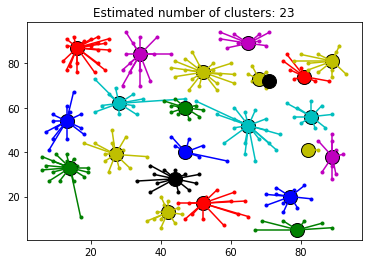

1
X length 357
Estimated number of clusters: 34
Silhouette Coefficient: 0.670


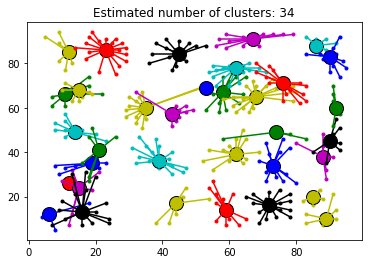

2
X length 290
Estimated number of clusters: 24
Silhouette Coefficient: 0.588


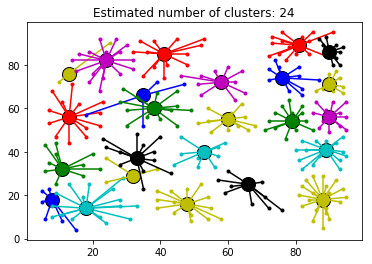

3
X length 394
Estimated number of clusters: 38
Silhouette Coefficient: 0.556


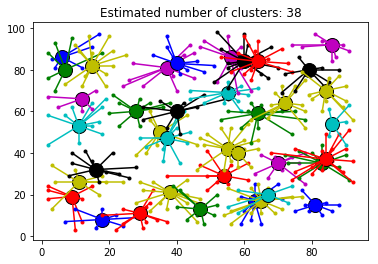

4
X length 249
Estimated number of clusters: 21
Silhouette Coefficient: 0.616


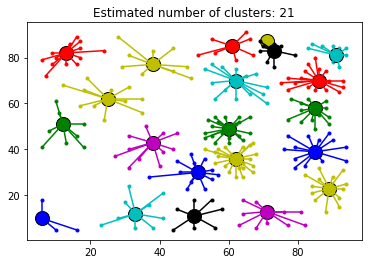

5
X length 303
Estimated number of clusters: 25
Silhouette Coefficient: 0.544


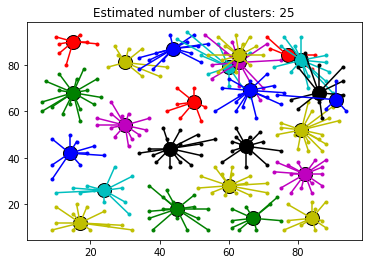

6
X length 225
Estimated number of clusters: 21
Silhouette Coefficient: 0.684


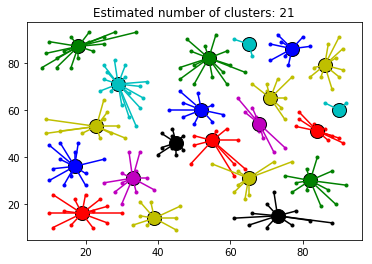

7
X length 380
Estimated number of clusters: 30
Silhouette Coefficient: 0.713


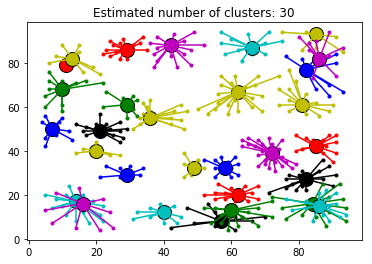

8
X length 219
Estimated number of clusters: 23
Silhouette Coefficient: 0.746


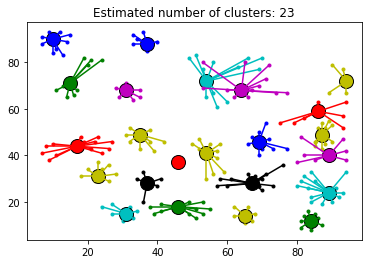

9
X length 267
Estimated number of clusters: 22
Silhouette Coefficient: 0.795


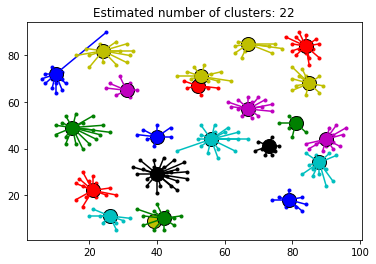

10
X length 367
Estimated number of clusters: 28
Silhouette Coefficient: 0.655


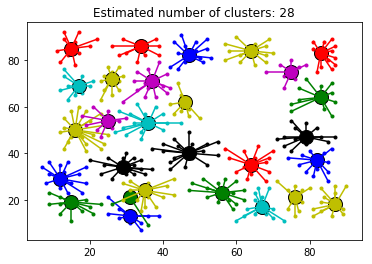

11
X length 366
Estimated number of clusters: 27
Silhouette Coefficient: 0.602


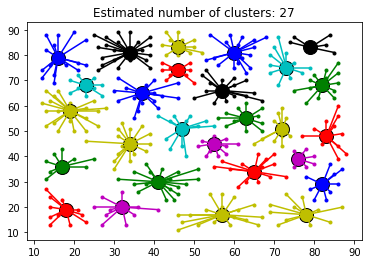

12
X length 58
Estimated number of clusters: 4
Silhouette Coefficient: 0.969


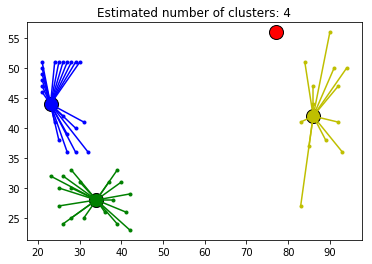

13
X length 423
Estimated number of clusters: 27
Silhouette Coefficient: 0.587


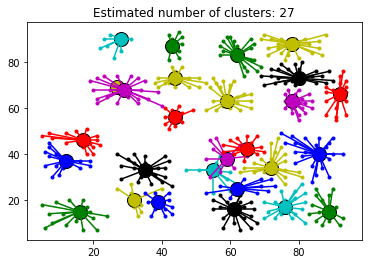

14
X length 216
Estimated number of clusters: 16
Silhouette Coefficient: 0.659


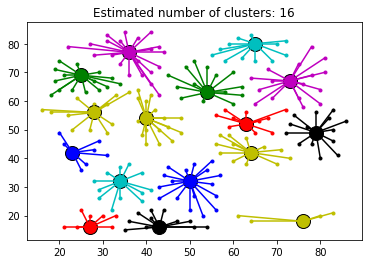

15
X length 310
Estimated number of clusters: 18
Silhouette Coefficient: 0.748


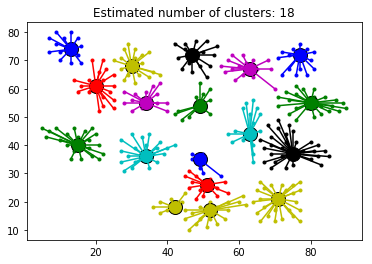

16
X length 253
Estimated number of clusters: 21
Silhouette Coefficient: 0.576


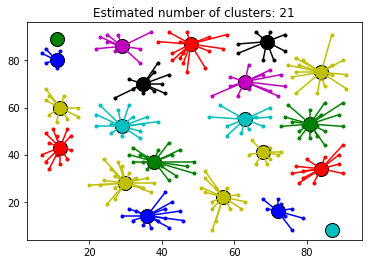

17
X length 266
Estimated number of clusters: 23
Silhouette Coefficient: 0.630


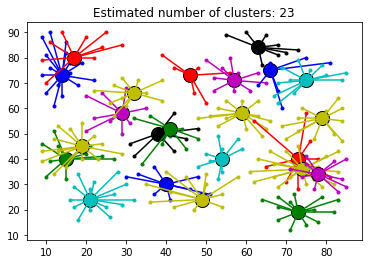

18
X length 266
Estimated number of clusters: 32
Silhouette Coefficient: 0.568


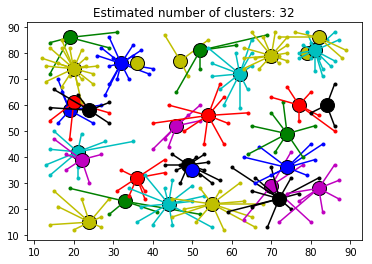

20
X length 201
Estimated number of clusters: 17
Silhouette Coefficient: 0.620


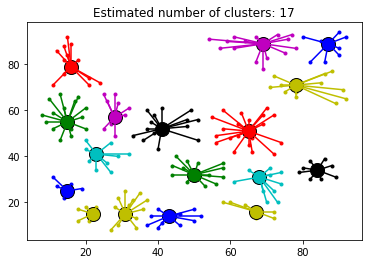

21
X length 227
Estimated number of clusters: 26
Silhouette Coefficient: 0.732


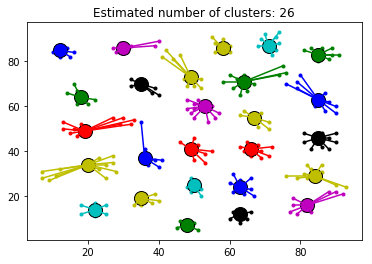

22
X length 409
Estimated number of clusters: 35
Silhouette Coefficient: 0.503


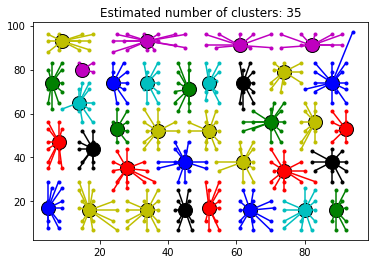

24
X length 108
Estimated number of clusters: 13
Silhouette Coefficient: 0.555


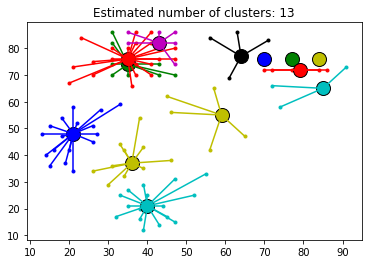

25
X length 234
Estimated number of clusters: 18
Silhouette Coefficient: 0.661


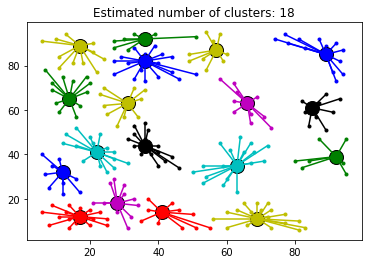

26
X length 239
Estimated number of clusters: 19
Silhouette Coefficient: 0.610


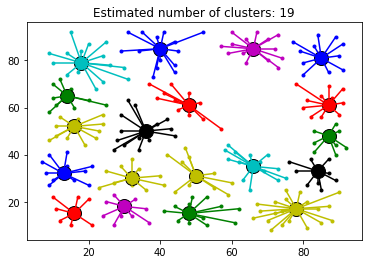

27
X length 279
Estimated number of clusters: 24
Silhouette Coefficient: 0.753


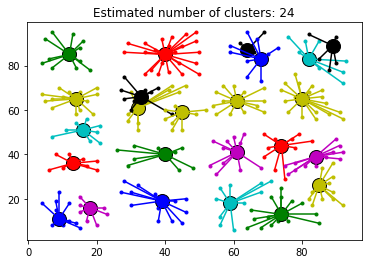

28
X length 165
Estimated number of clusters: 14
Silhouette Coefficient: 0.673


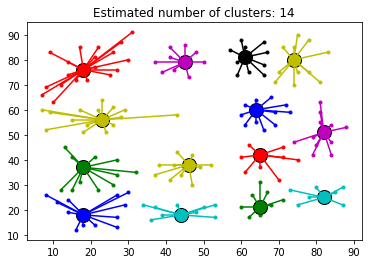

29
X length 191
Estimated number of clusters: 14
Silhouette Coefficient: 0.610


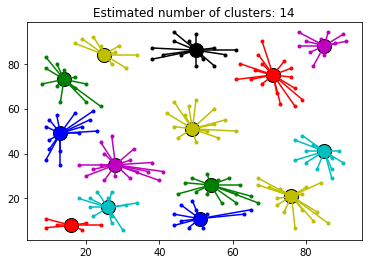

30
X length 275
Estimated number of clusters: 18
Silhouette Coefficient: 0.526


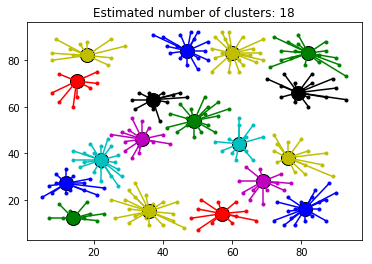

31
X length 245
Estimated number of clusters: 19
Silhouette Coefficient: 0.522


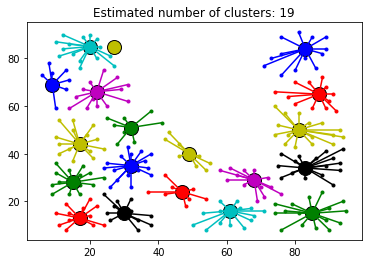

32
X length 184
Estimated number of clusters: 19
Silhouette Coefficient: 0.571


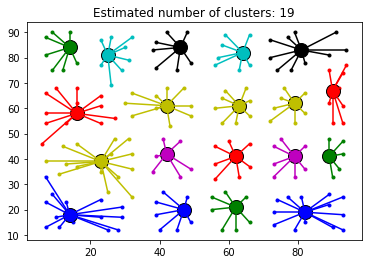

33
X length 261
Estimated number of clusters: 20
Silhouette Coefficient: 0.499


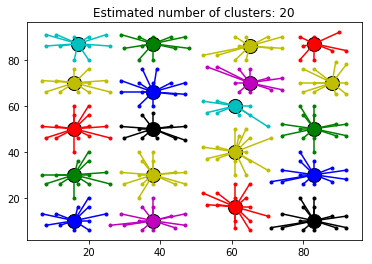

34
X length 177
Estimated number of clusters: 18
Silhouette Coefficient: 0.448


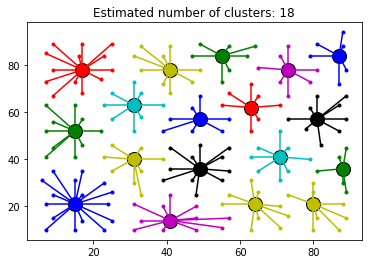

35
X length 298
Estimated number of clusters: 21
Silhouette Coefficient: 0.725


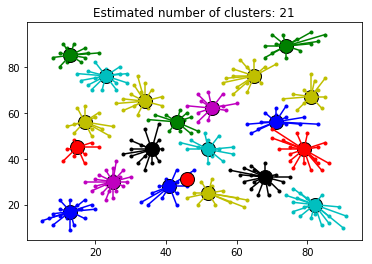

36
X length 173
Estimated number of clusters: 17
Silhouette Coefficient: 0.701


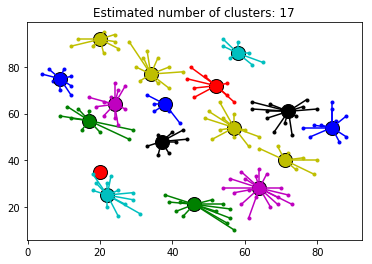

37
X length 192
Estimated number of clusters: 14
Silhouette Coefficient: 0.604


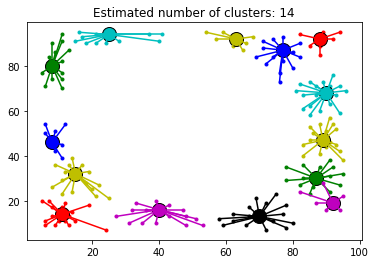

38
X length 157
Estimated number of clusters: 9
Silhouette Coefficient: 0.662


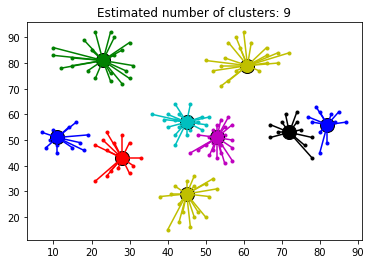

39
X length 287
Estimated number of clusters: 20
Silhouette Coefficient: 0.561


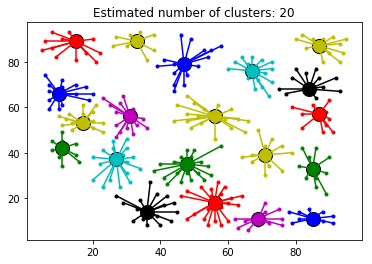

In [11]:
for mapId in range(0, noOfMaps):
    #Tavern/Minigames has no mobs, which breaks the computation, so skip it
    if(mapId == 40 or mapId == 19 or mapId == 23):
        continue
    print(mapId)
    ComputeAffinity(mapId)

#turn centers into coordinates + mob id
coord_centers = {}
for mapId in range(0, noOfMaps):
    coord_centers[mapId] = []
    if(mapId == 40 or mapId == 19 or mapId == 23):
        continue
        
    for center in centers[mapId]:
        coord = {}
        coord["x"] = computed_tiles[mapId][center][0]
        coord["y"] = computed_tiles[mapId][center][1]
        coord["b_i"] = computed_tiles[mapId][center][2]
        coord_centers[mapId].append(coord)
        


In [12]:
json.dumps(coord_centers)


'{"0": [{"x": 13, "y": 54, "b_i": 0}, {"x": 14, "y": 33, "b_i": 100}, {"x": 16, "y": 87, "b_i": 6}, {"x": 27, "y": 39, "b_i": 1}, {"x": 28, "y": 62, "b_i": 3}, {"x": 34, "y": 84, "b_i": 120}, {"x": 42, "y": 13, "b_i": 102}, {"x": 44, "y": 28, "b_i": 0}, {"x": 47, "y": 40, "b_i": 3}, {"x": 47, "y": 60, "b_i": 187}, {"x": 52, "y": 17, "b_i": 280}, {"x": 52, "y": 76, "b_i": 119}, {"x": 65, "y": 52, "b_i": 7}, {"x": 65, "y": 89, "b_i": 4}, {"x": 68, "y": 73, "b_i": 62}, {"x": 71, "y": 72, "b_i": 162}, {"x": 77, "y": 20, "b_i": 4}, {"x": 79, "y": 5, "b_i": 185}, {"x": 81, "y": 74, "b_i": 1}, {"x": 82, "y": 41, "b_i": 693}, {"x": 83, "y": 56, "b_i": 13}, {"x": 89, "y": 38, "b_i": 120}, {"x": 89, "y": 81, "b_i": 722}], "1": [{"x": 6, "y": 12, "b_i": 693}, {"x": 11, "y": 66, "b_i": 8}, {"x": 12, "y": 26, "b_i": 721}, {"x": 12, "y": 85, "b_i": 23}, {"x": 14, "y": 49, "b_i": 197}, {"x": 15, "y": 24, "b_i": 280}, {"x": 15, "y": 68, "b_i": 721}, {"x": 16, "y": 13, "b_i": 1}, {"x": 19, "y": 35, "b_

In [10]:
print(computed_tiles[0][0])


[6, 32, 101]
